# Методы семантического анализа текстов

## Сходство между словами

You shall know a word by the company it keeps. 

*Frith*

 Варкалось. Хливкие шорьки<br>
   Пырялись по наве,<br>
   И хрюкотали зелюки,<br>
   Как мюмзики в мове.<br>

*Кэррол*

Не очень ясно что именно могут делать *зелюки*. Но если мы узнаем кто еще может *хрюкотать*, то мы можем посчитать, что нашли слово со сходным значением или, как минимум, относящееся к одной смысловой группе.

Аналогично мы не понимаем кто (что) такие *шорьки*. Если они бывают ответственными - это одно, если электронными - другое.

- Возьмем текст и разделим его на слова, выделим слова со значимыми частями речи.
- Пройдемся по всем словам текста. Возьмем несколько соседних слов справа и слева от текущего. Посчитаем частоты их совместной встречаемости.
- Отсеем все слова, которые встречаются слишком редко или с малым количеством других слов.

In [1]:
import pandas as pd
import re
import nltk
import nltk.data
from tqdm.notebook import tqdm

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/edward/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
with open("data/lenta2018_summer2.txt", encoding="utf-8") as newsfile: # Файл с новостями.
    text = newsfile.read()
    div_text = text.split("=====\n")[1:]
    text_news = [(n.split('\n')[0], n.split('\n')[1], n.split('\n')[2], '\n'.join(n.split('\n')[3:])) 
                 for n in div_text]
    news = pd.DataFrame(text_news, columns = ['Header', 'Date', 'Tag', 'News'])

In [3]:
texts = list(news['News'])
texts[1111]

'Столичная полиция проверяет информацию о вымогательстве таксистом денег у гражданина Вьетнама, пишет «Московский комсомолец» со ссылкой на собственные источники. По информации газеты, мужчина, на родине работающий чиновником в правительстве, неоднократно бывал в России, знаком с ее обычаями и в этот раз, садясь в такси, предварительно договорился с водителем об оплате по счетчику. «Мужчина был настолько уверен в своем знании российской действительности, что даже не мог предположить, что станет жертвой мошенника», — отмечает издание. Однако по прибытии в аэропорт Шереметьево таксист потребовал заплатить ему 23,3 тысячи рублей, что не устроило пассажира. В ответ водитель заблокировал двери и окна и повез вьетнамца обратно, попутно угрожая ему расправой. Тот в итоге согласился отдать требуемую сумму, поскольку боялся за свою жизнь. Оказавшись в аэропорту, мужчина обратился в полицию, так как запомнил номер машины, однако ни такси, ни руководителя таксопарка найти не удалось. Как уточняет

Давайте поделим тексты на предложения, а предложения на слова

In [4]:
def text_to_wordlist(text):
    text = re.sub('[^a-zA-Zа-яА-яёЁ]', ' ', text)
    words = text.lower().split()
    return words

In [5]:
text_to_wordlist(texts[1111])

['столичная',
 'полиция',
 'проверяет',
 'информацию',
 'о',
 'вымогательстве',
 'таксистом',
 'денег',
 'у',
 'гражданина',
 'вьетнама',
 'пишет',
 'московский',
 'комсомолец',
 'со',
 'ссылкой',
 'на',
 'собственные',
 'источники',
 'по',
 'информации',
 'газеты',
 'мужчина',
 'на',
 'родине',
 'работающий',
 'чиновником',
 'в',
 'правительстве',
 'неоднократно',
 'бывал',
 'в',
 'россии',
 'знаком',
 'с',
 'ее',
 'обычаями',
 'и',
 'в',
 'этот',
 'раз',
 'садясь',
 'в',
 'такси',
 'предварительно',
 'договорился',
 'с',
 'водителем',
 'об',
 'оплате',
 'по',
 'счетчику',
 'мужчина',
 'был',
 'настолько',
 'уверен',
 'в',
 'своем',
 'знании',
 'российской',
 'действительности',
 'что',
 'даже',
 'не',
 'мог',
 'предположить',
 'что',
 'станет',
 'жертвой',
 'мошенника',
 'отмечает',
 'издание',
 'однако',
 'по',
 'прибытии',
 'в',
 'аэропорт',
 'шереметьево',
 'таксист',
 'потребовал',
 'заплатить',
 'ему',
 'тысячи',
 'рублей',
 'что',
 'не',
 'устроило',
 'пассажира',
 'в',
 'ответ

In [6]:
def text_to_sentences(text):
    sentences = []
    tokenizer = nltk.data.load('tokenizers/punkt/russian.pickle')
    raw_sentences = tokenizer.tokenize(text.strip())
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(text_to_wordlist(raw_sentence))
    return sentences

In [7]:
text_to_sentences(texts[1111])

[['столичная',
  'полиция',
  'проверяет',
  'информацию',
  'о',
  'вымогательстве',
  'таксистом',
  'денег',
  'у',
  'гражданина',
  'вьетнама',
  'пишет',
  'московский',
  'комсомолец',
  'со',
  'ссылкой',
  'на',
  'собственные',
  'источники'],
 ['по',
  'информации',
  'газеты',
  'мужчина',
  'на',
  'родине',
  'работающий',
  'чиновником',
  'в',
  'правительстве',
  'неоднократно',
  'бывал',
  'в',
  'россии',
  'знаком',
  'с',
  'ее',
  'обычаями',
  'и',
  'в',
  'этот',
  'раз',
  'садясь',
  'в',
  'такси',
  'предварительно',
  'договорился',
  'с',
  'водителем',
  'об',
  'оплате',
  'по',
  'счетчику'],
 ['мужчина',
  'был',
  'настолько',
  'уверен',
  'в',
  'своем',
  'знании',
  'российской',
  'действительности',
  'что',
  'даже',
  'не',
  'мог',
  'предположить',
  'что',
  'станет',
  'жертвой',
  'мошенника',
  'отмечает',
  'издание'],
 ['однако',
  'по',
  'прибытии',
  'в',
  'аэропорт',
  'шереметьево',
  'таксист',
  'потребовал',
  'заплатить',
 

Что за тип у sentences?

In [8]:
all_sentences = [text_to_sentences(x) for x in tqdm(texts)]

In [9]:
all_sentences = sum(all_sentences, [])

## Модель Word2Vec

Модель описана в статье [Т.Миколова и др.](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) Идея метода основывается на оптимизации функционала, основанного на логарифмах вероятностей совместной встречаемости слов. Помимо этого, вводятся отрицательные примеры, вероятности которых не суммируются, а вычитаются. При этом отрицательных примеров берется больше, чем положительных.

In [10]:
from gensim.models.word2vec import Word2Vec

In [11]:
%%time

# список параметров, которые можно менять по вашему желанию
num_features = 300  # итоговая размерность вектора каждого слова
min_word_count = 5  # минимальная частотность слова, чтобы оно попало в модель
num_workers = 3     # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
context = 10        # размер окна 
downsampling = 1e-3 # внутренняя метрика модели

model = Word2Vec(all_sentences, workers=num_workers, size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling)

CPU times: user 51.9 s, sys: 297 ms, total: 52.2 s
Wall time: 24.7 s


In [12]:
model.wv.most_similar('путин')

[('президент', 0.9207700490951538),
 ('трамп', 0.8821361660957336),
 ('владимир', 0.8659107685089111),
 ('порошенко', 0.8621619343757629),
 ('лукашенко', 0.8527759313583374),
 ('дуда', 0.830886721611023),
 ('путиным', 0.8236961960792542),
 ('трампу', 0.8236371278762817),
 ('лидер', 0.8233463764190674),
 ('меркель', 0.8219948410987854)]

In [23]:
model.wv.most_similar('интернет')

[('онлайн', 0.8824948668479919),
 ('сервиса', 0.8507270812988281),
 ('ретейлера', 0.8264392614364624),
 ('бренда', 0.8238682746887207),
 ('сервис', 0.8200693130493164),
 ('bronze', 0.8066372871398926),
 ('исследование', 0.8037646412849426),
 ('сеть', 0.8011834621429443),
 ('ch', 0.7985645532608032),
 ('group', 0.7971832752227783)]

In [24]:
model.wv.most_similar('ученые')

[('исследователи', 0.9322065114974976),
 ('выяснили', 0.8642357587814331),
 ('проанализировали', 0.8499432802200317),
 ('специалисты', 0.8392211198806763),
 ('стволовые', 0.8351675271987915),
 ('астрофизики', 0.8349477052688599),
 ('университета', 0.8269187211990356),
 ('эксперты', 0.8172383308410645),
 ('стэнфордского', 0.8145568370819092),
 ('показали', 0.8045694231987)]

### Обучение собственной модели в Word2Vec


Возьмем по тысяче научных текстов из пяти разных областей науки.

In [3]:
import pymorphy2

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 12)

In [12]:
sci_texts = pd.read_csv("data/kaggle-science-texts_train.tsv", header=0, sep = ';')

NameError: name 'pd' is not defined

In [5]:
# Импортируем библиотеки Word2Vec
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models import KeyedVectors # Семантические вектора.

import numpy as np

In [4]:
tmp_dict2 = {} # Кеш значимых слов.

morph = pymorphy2.MorphAnalyzer()

# Фильтруем по части речи и возвращаем только начальную форму.
def normalizePymorphy2(text):
    output = []
    # Делим на предложения самым страшным из возможных образов.
    sentences = text.split('.')
    for sentence in sentences:
        tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', sentence)
        # Берем предложения не менее чем из 5 слов.
        if len(tokens)<=4:
            continue
        words = []
        for t in tokens:
            # Если токен уже был закеширован, быстро возьмем результат из него.
            if t in tmp_dict2.keys():
                words.append(tmp_dict2[t])
            # Слово еще не встретилось, будем проводить медленный морфологический анализ.
            else:
                pv = morph.parse(t)
                if pv[0].tag.POS != None:
                    word = pv[0].normal_form+"_"+pv[0].tag.POS
                    # Отправляем слово в результат, ...
                    words.append(word)
                    # ... и кешируем результат его разбора.
                    tmp_dict2[t] = word
        output.append(words)
                    
    return output

In [17]:
all_sentences = []
for text in tqdm(sci_texts.Text):
    all_sentences.extend(normalizePymorphy2(text))

In [18]:
%%time

# список параметров, которые можно менять по вашему желанию
num_features = 50  # итоговая размерность вектора каждого слова
min_word_count = 5  # минимальная частотность слова, чтобы оно попало в модель
num_workers = 4     # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
context = 10        # размер окна 
downsampling = 1e-3 # внутренняя метрика модели

model = Word2Vec(all_sentences, workers=num_workers, size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling)

CPU times: user 3min 25s, sys: 1.12 s, total: 3min 26s
Wall time: 1min 9s


In [19]:
# Финализируем нашу модель. Ее нельзя будет доучить теперь, но она начнет занимать гораздо меньше места
model.init_sims(replace=True)

In [20]:
# Посмотрим на самые похожие слова.
model.wv.most_similar('система_NOUN')

[('непрерывный_ADJF', 0.6564866900444031),
 ('пространство_NOUN', 0.6504047513008118),
 ('подсистема_NOUN', 0.6316073536872864),
 ('принцип_NOUN', 0.627167820930481),
 ('структура_NOUN', 0.6034612655639648),
 ('базис_NOUN', 0.5995749235153198),
 ('медиапространство_NOUN', 0.5970025062561035),
 ('модель_NOUN', 0.5905737280845642),
 ('концепция_NOUN', 0.5875635147094727),
 ('условие_NOUN', 0.5834331512451172)]

In [21]:
model.wv.most_similar('говорить_VERB')

[('говорят_CONJ', 0.915028989315033),
 ('свидетельствовать_VERB', 0.7691066861152649),
 ('писать_VERB', 0.7487951517105103),
 ('сообщать_VERB', 0.7396399974822998),
 ('забывать_VERB', 0.7287258505821228),
 ('думать_VERB', 0.7216602563858032),
 ('знать_VERB', 0.7121174335479736),
 ('высказать_VERB', 0.694434642791748),
 ('убеждать_VERB', 0.6913986802101135),
 ('говориться_VERB', 0.6891759037971497)]

In [24]:
model.wv.most_similar('ученик_NOUN')

[('учитель_NOUN', 0.7734703421592712),
 ('воспитатель_NOUN', 0.7600758075714111),
 ('педагог_NOUN', 0.7412658929824829),
 ('родитель_NOUN', 0.7269795536994934),
 ('слушатель_NOUN', 0.726855993270874),
 ('ребята_NOUN', 0.7215189933776855),
 ('учащийся_ADJF', 0.7179864645004272),
 ('ребёнок_NOUN', 0.7122071981430054),
 ('учиться_INFN', 0.7008317708969116),
 ('воспитанник_NOUN', 0.6942462921142578)]

In [25]:
model.wv.most_similar('орех_NOUN')

[('сушёный_ADJF', 0.9264710545539856),
 ('лука_NOUN', 0.9087000489234924),
 ('посевная_NOUN', 0.9070317149162292),
 ('репчатый_ADJF', 0.9068731665611267),
 ('крапива_NOUN', 0.9013782143592834),
 ('вишня_NOUN', 0.89869624376297),
 ('зелень_NOUN', 0.8981157541275024),
 ('перец_NOUN', 0.8965607285499573),
 ('плодовый_ADJF', 0.8947007060050964),
 ('ягодный_ADJF', 0.8936190009117126)]

Итак, вместо самих слов мы можем использовать их векторные представления в некотором семантическом пространстве.

<img src="img/cartoon-espresso-word2vec.jpg">

Беда Word2Vec состоит в том, что он генерирует только один вектор на каждое слово. То есть он не различает различных смыслов одного слова.

<img src="img/cartoon-citizen-data-scientist.jpg">

Можно найти лишнее слово в последовательности.

In [26]:
model.wv.doesnt_match(['лука_NOUN', 'перец_NOUN', 'ученик_NOUN', 'плодовый_ADJF'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'ученик_NOUN'

In [27]:
# Размер проанализированного корпуса
model.corpus_total_words

9523201

Теперь вернемся к размеру векторов.

In [28]:
model.vector_size

50

Можно провести аналогию с SVD. У нас строится некоторое пространство, размерность которого определяется числом латентных переменных в системе - скрытых параметров, каждый из которых отвечает за какой-то "смысл": размер, цвет, политика, время, абстрактность, падеж слова и прочее.

Количество признаков в этом пространстве определяется числом подобных скрытых переменных.

В полученном пространстве работают векторные операции. Если обучиться на достаточно большом количестве текстов, можно получить следующие эффекты.

![](img/w2v_vect.png)

![](img/w2v_vect2.png)



На хорошо обученной модели можно даже превратить индекс в город и наоборот при помощи векторных операций.

----

### Использование предобученных моделей

Теперь загрузим модель, обученную разработчиками проекта <a href="http://rusvectores.org/ru/models/">RusVectores</a> для русского языка на новостях. В зависимости от того, откуда вы берете модели, они могут загружаться по-разному. Более того, модель можно обучить самому - для этого нужно просто взять много размеченных текстов.

In [29]:
model_w2v = KeyedVectors.load_word2vec_format('data/model.bin', binary=True)

Теперь можно получить представление слов в новом пространстве. Имейте в виду, что в данной модели они идут с частями речи!

In [30]:
model_w2v['огонь_NOUN']

array([-2.89093167e-01, -9.14475098e-02, -2.09228948e-01, -1.87711306e-02,
       -1.34538531e-01,  1.49577990e-01, -4.16043639e-01, -2.19271779e-02,
        2.24913687e-01, -1.58189252e-01,  7.52657056e-01, -3.72155190e-01,
       -4.24345344e-01,  2.19568521e-01,  2.81614542e-01, -1.05553530e-01,
       -6.12342715e-01, -8.54846165e-02,  1.58721164e-01,  3.23334709e-02,
       -2.51197219e-01, -4.70231682e-01,  1.37135968e-01,  7.78701425e-01,
       -1.58269405e-01, -6.19720062e-03,  8.47440287e-02,  2.64792979e-01,
        1.43808901e-01,  6.88107759e-02,  4.44484115e-01,  3.20041299e-01,
        2.03348488e-01, -2.17118680e-01,  1.03013404e-01, -2.88536072e-01,
       -2.20832705e-01, -2.25081980e-01, -1.66140959e-01,  2.09119953e-02,
       -1.90990701e-01, -5.35046794e-02, -9.56191272e-02, -3.77724290e-01,
       -1.06212422e-01,  9.42071080e-02, -2.15798587e-01,  3.25907260e-01,
       -1.41780600e-01, -3.13282520e-01, -1.53498590e-01, -5.31325452e-02,
       -2.87452281e-01, -

В пространстве Word2Vec возможны векторные операции. Попробуем их.

In [35]:
#model_w2v.most_similar(positive=[u'пожар_NOUN'])
#model_w2v.most_similar(positive=[u'пожар_NOUN'], negative=[u'пламя_NOUN' ])
model_w2v.most_similar(positive=[u'топливо_NOUN', u'творог_NOUN'], negative=[u'нефть_NOUN' ])
#model_w2v.most_similar(positive=[u'женщина_NOUN', u'император_NOUN' ], negative=[u'мужчина_NOUN'])
#model_w2v.most_similar(positive=[u'король_NOUN', u'женщина_NOUN'], negative=[u'мужчина_NOUN'])
#model_w2v.most_similar(positive=[u'президент_NOUN', u'женщина_NOUN'], negative=[u'мужчина_NOUN'])
#model_w2v.most_similar(negative=[u'король_NOUN', u'мужчина_NOUN'], positive=[u'женщина_NOUN'])
#model_w2v.most_similar(positive=[u'женщина_NOUN', u'король_NOUN' ])
#model_w2v.most_similar(positive=[u'берлин_PROPN', u'москва_PROPN' ], negative=[u'германия_PROPN'])


[('творожный_ADJ', 0.46959036588668823),
 ('паштет_NOUN', 0.4646683931350708),
 ('сметана_VERB', 0.4503159821033478),
 ('сметана_NOUN', 0.43964970111846924),
 ('сгущать_ADJ', 0.42841488122940063),
 ('салатный_ADJ', 0.42720267176628113),
 ('зелень_NOUN', 0.4132440984249115),
 ('тушенка_NOUN', 0.41092649102211),
 ('сгущенный_ADJ', 0.4079738259315491),
 ('редис_NOUN', 0.40763604640960693)]

Переразметим наши тексты так, чтобы они содержали в себе и часть речи, понятную загруженной модели.

In [36]:
# Список значимых частей речи.
conv_pos = {'ADJF':'ADJ', 'ADJS':'ADJ', 'ADV':'ADV', 'NOUN':'NOUN', 'VERB':'VERB'}

tmp_dict = {}
nones = {}

# Фильтруем по части речи и возвращаем только начальную форму.
def normalizePymorphy3(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        if t in tmp_dict.keys():
            words.append(tmp_dict[t])
        elif t in nones.keys():
            pass
        else:
            pv = morph.parse(t)
            if pv[0].tag.POS != None:
                if pv[0].tag.POS in conv_pos.keys():
                    words.append(pv[0].normal_form+"_"+conv_pos[pv[0].tag.POS])
                    tmp_dict[t] = pv[0].normal_form+"_"+conv_pos[pv[0].tag.POS]
                else:
                    nones[t] = ""
                    
    return words

Теперь посмотрим какова размерность векторов, хранимых в модели, и сколько в ней слов.<br>
Размерность векторов 300 - с запасом. Почти 250 000 слов - тоже очень хорошо.

In [37]:
print(model_w2v.vector_size)
print(len(model_w2v.index2word))

300
249318


In [27]:
model_w2v.index2word[:50]

['xxxxxx_NUM',
 'год_NOUN',
 'россия_PROPN',
 'сообщать_VERB',
 'xxxxxxxx_NUM',
 'xxxxxxx_NUM',
 'российский_ADJ',
 'мочь_VERB',
 'человек_NOUN',
 'заявлять_VERB',
 'дело_NOUN',
 'новый_ADJ',
 'сша_PROPN',
 'страна_NOUN',
 'компания_NOUN',
 'рубль_NOUN',
 'также_ADV',
 'один_NUM',
 'время_NOUN',
 'президент_NOUN',
 'становиться_VERB',
 'слово_NOUN',
 'москва_PROPN',
 'два_NUM',
 'отмечать_VERB',
 'первый_ADJ',
 'суд_NOUN',
 'глава_NOUN',
 'получать_VERB',
 'господин_NOUN',
 'миллион_NOUN',
 'область_NOUN',
 'принимать_VERB',
 'тысяча_NOUN',
 'данные_NOUN',
 'представитель_NOUN',
 'решение_NOUN',
 'проходить_VERB',
 'ранее_ADV',
 'украина_PROPN',
 'проводить_VERB',
 'более_ADV',
 'уже_ADV',
 'город_NOUN',
 'говорить_VERB',
 'еще_ADV',
 'работа_NOUN',
 'быть_VERB',
 'миллиард_NOUN',
 'результат_NOUN']

У нас есть смысл отдельных слов. Построим на его основе смысл текста как среднее арифметическое всех векторов для слов, составляющих данный текст.

In [38]:
index2word_set = set(model_w2v.index2word)

def text_to_vec(text):
    text_vec = np.zeros((model_w2v.vector_size,), dtype="float32")
    n_words = 0

    for word in normalizePymorphy3(text):
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model_w2v[word]) 
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec


In [39]:
with open("data/lenta2018_summer2.txt", encoding="utf-8") as newsfile: # Файл с новостями.
    text = newsfile.read()
    div_text = text.split("=====\n")[1:]
    text_news = [(n.split('\n')[0], n.split('\n')[1], n.split('\n')[2], '\n'.join(n.split('\n')[3:])) 
                 for n in div_text]
    news = pd.DataFrame(text_news, columns = ['Header', 'Date', 'Tag', 'News'])

In [40]:
news.head()

,Header,Date,Tag,News
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,-----,Шведская YouTube-знаменитость Симона Герц (Sim...
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,-----,Перспективный российский многофункциональный и...
2,Знарок лишился еще одного поста,2018/06/01,-----,Санкт-петербургский клуб Континентальной хокке...
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,-----,Следственный комитет по Москве начал проверку ...
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,-----,Более 100 жителей Киева перекрыли проспект Гри...


Рассчитаем вектора всех текстов - они нам еще пригодятся.

In [41]:
w2v_vectors = [text_to_vec(text) for text in news.News]

Найдем текст, самый похожий на текст про Су-57.

In [43]:
news.News[vpos]

'Перспективный российский многофункциональный истребитель пятого поколения Су-57 не имеет мировых аналогов и о нем не могут судить «дилетанты из СМИ», поскольку его «ноу-хау являются тайной», о которых знают лишь «профессионалы, испытатели, военное руководство страны». Такую точку зрения РИА Новости высказал летчик-испытатель Магомед Толбоев. «Ни на одном самолете еще никогда не удавалось добиться того, чтобы на крейсерских сверхзвуковых скоростях (1600 километров в час) можно было летать в бесфорсажном режиме. Форсажный режим сопряжен с огромной тратой топлива, а Су-57 может развивать крейсерскую скорость "на номинале". Этого в мире еще не добился никто — ни Франция, ни Англия, ни Rolls-Royce, ни Pratt & Whitney — никто», — говорит Толбоев. Летчик-испытатель называет Су-57 «будущим российской боевой авиации». «В нем реализованы самые передовые технологии и то, что демонстрируется широкой общественности, — это лишь поверхность, остальное знаем только мы — профессионалы, испытатели, вое

In [42]:
vpos=1
v1 = text_to_vec(news.News[vpos])

ms = np.argmin([np.linalg.norm(v1-w2v_vectors[i]) for i in range(news.News.shape[0]) if i!=vpos])
if ms>vpos:
    print(ms+1, news.News[ms+1])
else:
    print(ms, news.News[ms])

10612 Истребители Су-34 и Су-35, которые «активно поставляются в войска», а также Су-30СМ «решают поставленные задачи», но будущее все равно за Су-57, заявил «Комсомольской правде» президент «Объединенной авиастроительной корпорации» (ОАК) Юрий Слюсарь. По его утверждению, у российского истребителя пятого поколения «принципиально другие возможности по малозаметности, по набору авиационных средств поражения, по бортовому комплексу обороны, по средствам радиоэлектронной борьбы». Комментируя слухи о том, что у Минобороны «пропал аппетит к Су-57», топ-менеджер отметил, что «военные самолетом довольны». «Сейчас мы находимся на этапе испытаний непосредственно представителями Минобороны. Такая машина будет определять облик боевой авиации России в ближайшем будущем. Другое дело, с какой скоростью будет происходить обновление», — сказал глава ОАК. Слюсарь добавил, что «в ближайшей перспективе» ВВС РФ получат 15 машин Су-57, а дискуссия в прессе, касающаяся темпов поставок этих истребителей, «во

In [44]:
from umap import UMAP

In [45]:
umap_news=UMAP()
umaped_vct=umap_news.fit_transform(w2v_vectors)

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../usr/local/lib/python3.6/dist-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/usr/local/lib/python3.6/dist-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../usr/local/lib/python3.6/dist-packages/umap/utils.py",

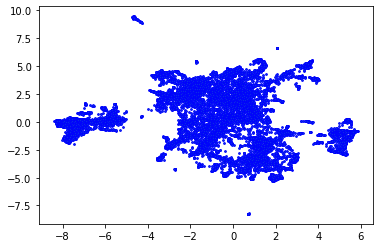

In [46]:
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='b', s=3)
plt.show()

In [47]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from matplotlib.colors import ListedColormap
from numpy.random import choice

Посмотрим что будет, если обучить на данных после преобразования пространства.

94


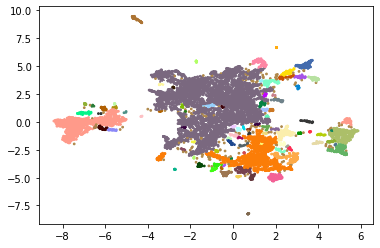

In [48]:
db=DBSCAN(eps=0.12, min_samples=3)
db_clusters=db.fit_predict(umaped_vct)
myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print(max(db_clusters))
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=db_clusters, cmap=myclr)
plt.show()


In [49]:
clusters=list(set(db_clusters))

for c in clusters:
    print(c)
    cntr=0
    for i, a in enumerate(news.Header):
        if db_clusters[i]==c:
            print(a)
            cntr+=1
            if cntr==3:
                break

0
«Королева дерьмовых роботов» перенесла операцию на мозге
СК заинтересовался задержанием аутиста московскими полицейскими
Киевляне перекрыли проспект из-за сбитого полицейскими ребенка-велосипедиста
1
У Су-57 нашли «тайные ноу-хау»
Донецкие «Чебурашки» отомстили за гибель командира ополчения Мамая
Полет МиГ-31 в стратосфере попал на видео
2
Знарок лишился еще одного поста
Уткин обозвал Черчесова медной статуей
Капитана «Реала» завалили угрозами за травму Салаха
3
Российская легкоатлетка одержала 40 побед подряд
Российскую олимпийскую чемпионку отказались пускать на Украину
Олимпийский чемпион прокомментировал информацию о романе с Медведевой
4
В Google обнаружили «самый странный» сбой
Павла Дурова обвинили в краже чужой разработки
В WhatsApp обнаружили надоедливую ошибку
5
Ким Чен Ын предложил Путину встретиться
В Южной Корее полюбили Ким Чен Ына
Северная Корея потребовала от США «следить за своим языком»
6
Госдума потратит миллионы рублей на изучение опыта борьбы с бедностью
Canon ра

Попробуем теперь провести кластеризацию в исходном пространстве.

Предварительно прикинем значение $\epsilon$ по расстоянию до ближайших соседей. Для этого используем функцию для построения графа k ближайших соседей из sklearn.

In [71]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans

In [51]:
# Строит разреженный граф, в котором на месте связей с ближайшими соседями стоят единицы.
wm = kneighbors_graph(w2v_vectors, 3, n_jobs=-1)

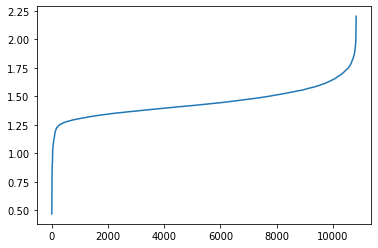

In [41]:
nzr, nzc = wm.nonzero()
neighbours = np.zeros(len(w2v_vectors))
for r, c in zip(nzr, nzc):
    neighbours[r] += np.linalg.norm(v1-w2v_vectors[c])
    
neighbours=sorted(neighbours/3)
fig, ax = plt.subplots()
ax.plot(range(len(neighbours)), neighbours)
plt.show()    

Теперь проведем кластеризацию.

126


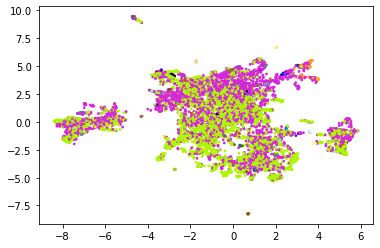

In [54]:
db=DBSCAN(eps=0.8, min_samples=3)
db_clusters=db.fit_predict(w2v_vectors)
myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print(max(db_clusters))
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=db_clusters, cmap=myclr)
plt.show()

In [45]:
clusters=list(set(db_clusters))

for c in clusters:
    print(c)
    cntr=0
    for i, a in enumerate(news.Header):
        if db_clusters[i]==c:
            print(a)
            cntr+=1
            if cntr==3:
                break

0
У Су-57 нашли «тайные ноу-хау»
СК заинтересовался задержанием аутиста московскими полицейскими
Киевляне перекрыли проспект из-за сбитого полицейскими ребенка-велосипедиста
1
Нидерланды задумались привлечь Киев к ответственности за крушение «Боинга»
Нидерланды сняли с Украины ответственность за гибель MH17 в Донбассе
Родные жертв крушения «Боинга» в Донбассе пристыдили Россию
2
Выявлен новый способ продления жизни
Доказана эффективность вакцины против рака мозга
Опровергнута популярная гипотеза о Вселенной
3
Названы специалисты с самыми большими в России зарплатами
Названы работники с самой маленькой зарплатой в России
Реальная зарплата россиян резко упала
4
На «Пикнике Афиши» выступят Земфира и Дельфин
На «Пикнике Афиши» выступит Монеточка
На «Пикнике Афиши» выступят рэперы Пимп и OFFMi
5
Выступления фестиваля Primavera Sound можно будет пережить заново
Migos отменили выступление на фестивале Primavera
На фестивале Primavera выступит Skepta
6
Крупная акула вцепилась зубами в лодку
См

Полыхающая уникальная церковь XVIII века в Карелии попала на видео
Подросток-сатанист сжег уникальную церковь XVIII века в Карелии
Стали известны подробности про поджигателя церкви подростка-сатаниста
113
Величайшая певица в истории оказалась при смерти
Умерла величайшая певица в истории
Названа причина смерти величайшей певицы в истории
114
Четверо туристов остались замерзать на алтайской горе
Российские туристы пострадали при жесткой посадке вертолета в Таджикистане
Таджикский туроператор отказался спасать россиян в горах
115
Взрыв в Болонье разнес трассу и покалечил десятки человек
Автомобильный мост рухнул в итальянской Генуе и убил десятки людей
Под рухнувшим мостом в Италии нашли выживших
116
Украинцы вновь облюбовали Крым
Объявлена стоимость рекламного ролика о Крыме
Украинские туристы полюбили Крым наперекор своим властям
117
Россиян предупредили о росте цен на мясную продукцию
Российские мясники попросили правительство помочь повысить цены
Цены на мясо оправдали шашлыками
118


Теперь вернемся к научным статьям.

При объединении всех векторов текста происходит размытие его смысла за счет того, что некоторые понятия хоть и являются близкими, но имеют различия. Вместо того, чтобы брать само слово, давайте объединим все слова одной группы и будем брать их центроид. Заодно посмотрим какие слова попадают в одну группу.

In [64]:
%%time
sci_texts['NText'] = sci_texts['Text'].map(lambda x:' '.join(normalizePymorphy3(x)))

CPU times: user 35.6 s, sys: 113 ms, total: 35.7 s
Wall time: 35.7 s


In [65]:
%%time
dct = {}
# Бежим по статьям.
for article in sci_texts.NText:
    # Берем слово. Потом берем 4 соседа слева и справа.
    words = article.split(' ')
    for i, word1 in enumerate(words[4:-5]):
        for j, word2 in enumerate(words[i-4:i+4]):
            if i!=j:
                # Если основного слова еще не встречалось - добавляем его.
                if word1 not in dct.keys():
                    dct[word1] = {}
                cdict = dct[word1]
                # Говорим, что эти два слова еще раз встретились вместе.
                cdict[word2] = cdict.get(word2, 0) +1


CPU times: user 47 s, sys: 412 ms, total: 47.4 s
Wall time: 47.7 s


In [66]:
# Возьмем слова, которые встречаются больше чем с 10 другими словами, каждое из которых встречается чаще 5 раз.
fd = {w:{k:np.log10(i) for k,i in dct[w].items() if i>5} for w in dct.keys() 
      if len([dct[w][k] for k in dct[w] if dct[w][k]>5])>10}

In [67]:
# Берем вектора слов.
sci_vects = []
sci_words = []
for word in fd.keys():
    try:
        sci_vects.append(model.wv[word])
        sci_words.append(word)
    except Exception:
        pass

In [68]:
# Посмотрим как вообще слова распределены в пространстве.
sci_map = UMAP()
sci_reduced = sci_map.fit_transform(sci_vects)

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../usr/local/lib/python3.6/dist-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


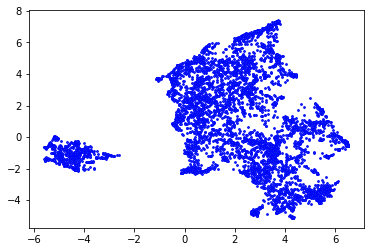

In [69]:
fig, ax = plt.subplots()
ax.scatter(sci_reduced[:, 0], sci_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=3)
plt.show()

In [72]:
%%time
# Кластеризуем, в среднем по два слова на кластер.
sci_clust_no = int(len(sci_vects)/2)
km_clustering = KMeans(n_clusters=sci_clust_no)
sci_clusters = km_clustering.fit_predict(sci_vects)

CPU times: user 4min 44s, sys: 3min 48s, total: 8min 33s
Wall time: 1min 39s


In [73]:
# Какие слова попадают в один кластер.
clust_no=6

sci_words_sorted = sorted(zip(sci_clusters, sci_words), key= lambda x:x[0])
print([word[1] for word in sci_words_sorted if word[0]==clust_no])

['саморазвитие_NOUN', 'самосовершенствование_NOUN', 'самообразование_NOUN', 'самообучение_NOUN', 'самопознание_NOUN']


In [74]:
# Посчитаем координаты центроидов.
cur_clust = sci_words_sorted[0][0]
cur_coord = np.array(model[sci_words_sorted[0][1]])
cur_count = 1
clust_coord = []

for i, word in enumerate(sci_words_sorted[1:]):
    if cur_clust == sci_words_sorted[i+1][0]:
        cur_coord += model[sci_words_sorted[i+1][1]]
        cur_count += 1
    else:
        clust_coord.append(cur_coord/cur_count)
        cur_clust = sci_words_sorted[i+1][0]
        cur_coord = np.array(model[sci_words_sorted[i+1][1]])
        cur_count = 1
        
clust_coord.append(cur_coord/cur_count)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [75]:
# Эта функция берет центры кластеров вместо слов.
sci_set = set(sci_words)
sci_words_d = {w[1]:w[0] for w in sci_words_sorted}

def text_to_vec_centr(text):
    text_vec = np.zeros((model.vector_size,), dtype="float32")
    n_words = 0

    for sent in normalizePymorphy2(text):
        for word in sent:
            if word in sci_words_d.keys():
                n_words = n_words + 1
                text_vec = np.add(text_vec, clust_coord[sci_words_d[word]]) 
            else:
                try:
                    text_vec = np.add(text_vec, model_w2v[word]) 
                    n_words = n_words + 1
                except Exception:
                    pass
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec


In [76]:
# Строим вектора для слов.
sci_vect2 = []
for text in tqdm(sci_texts.Text):
    sci_vect2.append(text_to_vec_centr(text))

In [77]:
# Посмотрим как распределятся документы при таком подходе.
umap_sci=UMAP()
umaped_vct=umap_sci.fit_transform(sci_vect2)

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../usr/local/lib/python3.6/dist-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


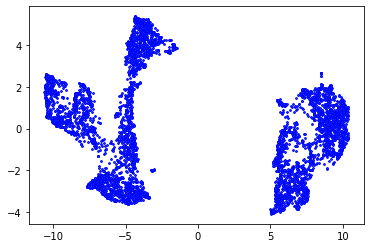

In [78]:
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='b', s=3)
plt.show()

94


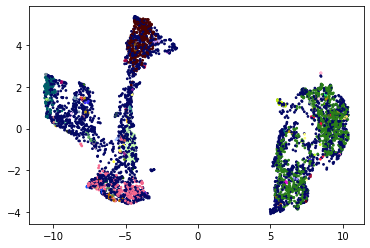

In [79]:
# Раскластеризуем документы.
db=DBSCAN(eps=0.1, min_samples=3)
db_clusters=db.fit_predict(sci_vect2)
myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print(max(db_clusters))
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=db_clusters, cmap=myclr)
plt.show()

In [80]:
# Посмотрим на них глазами.
clusters=list(set(db_clusters))

for c in clusters:
    print('          __ ', c, ' __')
    cntr=0
    for i, a in enumerate(sci_texts.Text):
        if db_clusters[i]==c:
            print(a[:200])
            cntr+=1
            if cntr==3:
                break

          __  0  __
                                               ﻿молочные продукты с комбинированной жировой фазой                н.а. лапшинская, н.а. драгун, ю.ю. аленичева__________                проблема ресурсос
                                               ﻿молочные продукты с комбинированной жировой фазой                н.а. лапшинская, н.а. драгун, ю.ю. аленичева__________                проблема ресурсос
                                               ﻿проблемы формировйния и сохранения качества жененного мармепапа                табаторович а.н.,                аспирант сибирского университета потреби
          __  1  __
                                               ﻿отраслевые рынки и рыночная инфраструктура                удк 338.3.01: 338.439:336.01                формирование вертикально-интегрированных образован
                                               ﻿отраслевые рынки и рыночная инфраструктура                удк 338.3.01: 338.439:336.01                формир

А теперь поступим по-другому. Разделим слова на 50 кластеров, а в качестве вектора признаков документа будем брать число слов данного документа, попадающих в каждый кластер.

In [92]:
%%time
cluster_space_size = 50
km_clustering = KMeans(n_clusters=cluster_space_size)
sci_clusters = km_clustering.fit_predict(sci_vects)

CPU times: user 10.5 s, sys: 8.01 s, total: 18.5 s
Wall time: 3.56 s


In [93]:
# Эта функция берет для документа количество слов по кластерам..
sci_set = set(sci_words)
sci_words_d = {w[1]:w[0] for w in sci_words_sorted}

def text_to_centoids(text):
    text_vec = np.zeros((cluster_space_size,), dtype="float32")
    n_words = 0

    for sent in normalizePymorphy2(text):
        for word in sent:
            if word in sci_words_d.keys():
                n_words = n_words + 1
                text_vec[clust_coord[sci_words_d[word]]] += 1
    
    if np.sum(text_vec) != 0:
        text_vec /= np.sum(text_vec)
    return text_vec


In [94]:
clust_coord[sci_words_d['процесс_NOUN']]

array([-0.02962076,  0.11527845,  0.02829208, -0.17766328, -0.00839991,
       -0.02240399, -0.17437351,  0.00404358,  0.33228213,  0.05027545,
        0.09221265, -0.04474068,  0.01199407,  0.11565028,  0.16804907,
        0.21068752, -0.0906543 , -0.24678856, -0.17106372, -0.07630199,
       -0.01243008, -0.15324189,  0.02815696,  0.09368209,  0.2193552 ,
       -0.06025086,  0.06428657,  0.15177292, -0.05521143,  0.26888782,
       -0.136334  , -0.09319802,  0.16253175, -0.00308083, -0.24438798,
       -0.12822407, -0.05469146, -0.03841072, -0.11990838, -0.02155544,
       -0.2209048 , -0.06916629,  0.06529331,  0.03687801,  0.08296055,
       -0.07342312, -0.13149416,  0.18795894, -0.08389762,  0.12474991],
      dtype=float32)

In [95]:
# Эта функция берет для документа количество слов по кластерам..
sci_set = set(sci_words)
sci_words_d = {w[1]:w[0] for w in sorted(zip(sci_clusters, sci_words), key= lambda x:x[0])}

def text_to_centoids(text):
    text_vec = np.zeros((cluster_space_size,), dtype="float32")
    n_words = 0

    for word in text.split():
        if word in sci_words_d.keys():
            text_vec[sci_words_d[word]] += 1
    
    if np.sum(text_vec) != 0:
        text_vec /= np.sum(text_vec)
    return text_vec


In [96]:
# Строим вектора для слов.
sci_vect3 = []
for text in tqdm(sci_texts.NText):
    sci_vect3.append(text_to_centoids(text))

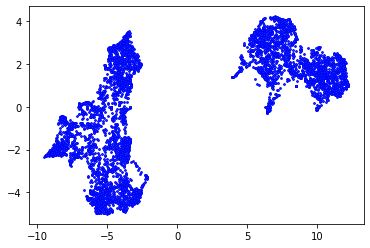

In [114]:
# Посмотрим как распределятся документы при таком подходе.
umap_sci=UMAP()
umaped_vct=umap_sci.fit_transform(sci_vect3)

fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='b', s=3)
plt.show()

101


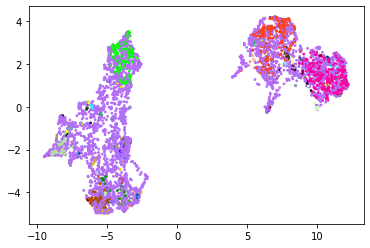

In [119]:
# Раскластеризуем документы.
db=DBSCAN(eps=0.075, min_samples=3)
db_clusters=db.fit_predict(sci_vect3)
myclr=ListedColormap(choice(list(sns.xkcd_rgb.values()), max(db_clusters)+1)) # Генерируем контрастную карту цветов.
print(max(db_clusters))
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], s=3, c=db_clusters, cmap=myclr)
plt.show()

In [98]:
# Посмотрим на них глазами.
clusters=list(set(db_clusters))

for c in clusters:
    print(f'__ {c} __')
    cntr=0
    for i, a in enumerate(sci_texts.Text):
        if db_clusters[i]==c:
            print(a[:200])
            cntr+=1
            if cntr==3:
                break

__  0  __
                                               ﻿отраслевые рынки и рыночная инфраструктура                удк 338.3.01: 338.439:336.01                формирование вертикально-интегрированных образован
                                               ﻿отраслевые рынки и рыночная инфраструктура                удк 338.3.01: 338.439:336.01                формирование вертикально-интегрированных образован
                                               ﻿удк 65.011.8                а.г. оловянишников                реструктуризация предприятий пищевой промышленности в отечественной и зарубежной практике 
__  1  __
                                               ﻿удк 557.1:664.6/7                биотехнологическая характеристика соевых продуктов © 2007 г. м.п. могильный                the problem of protein suppl
                                               ﻿переработка продукции сельского хозяйства                удк 664.87	м.п. щетинин,                л.е. мелёшкина, а.в. снегирева 

In [1]:
from gensim.models.fasttext import FastText

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [8]:
#model_ft = KeyedVectors.load_fasttext_format('data/araneum_none_fasttextskipgram_300_5_2018.tgz', binary=True)

#model_ft = FastText.load('data/araneum_none_fasttextskipgram_300_5_2018.tgz')


In [5]:
tmp_dict2 = {} # Кеш значимых слов.

morph = pymorphy2.MorphAnalyzer()

# Фильтруем по части речи и возвращаем только начальную форму.
def normalizePymorphy3(text):
    output = []
    # Делим на предложения самым страшным из возможных образов.
    sentences = text.split('.')
    for sentence in sentences:
        tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', sentence)
        # Берем предложения не менее чем из 5 слов.
        if len(tokens)<=4:
            continue
        words = []
        for t in tokens:
            # Если токен уже был закеширован, быстро возьмем результат из него.
            if t in tmp_dict2.keys():
                words.append(tmp_dict2[t])
            # Слово еще не встретилось, будем проводить медленный морфологический анализ.
            else:
                pv = morph.parse(t)
                if pv[0].tag.POS != None:
                    # Отправляем слово в результат, ...
                    words.append(pv[0].normal_form)
                    # ... и кешируем результат его разбора.
                    tmp_dict2[t] = pv[0].normal_form
        output.append(words)
                    
    return output

In [6]:
all_sentences = []
for text in tqdm(news.News):
    all_sentences.extend(normalizePymorphy3(text))

In [8]:
%%time
# список параметров, которые можно менять по вашему желанию
num_features = 300  # итоговая размерность вектора каждого слова
min_word_count = 5  # минимальная частотность слова, чтобы оно попало в модель
num_workers = 3     # количество ядер вашего процессора, чтоб запустить обучение в несколько потоков
context = 10        # размер окна 
downsampling = 1e-3 # внутренняя метрика модели


model_ft = FastText(all_sentences, workers=num_workers, size=num_features,
                 min_count=min_word_count, window=context, sample=downsampling)

CPU times: user 4min 15s, sys: 5.22 s, total: 4min 20s
Wall time: 1min 59s


In [9]:
model_ft.init_sims(replace=True)

In [ ]:
model_ft.save("data/fast_text_news.bin")

In [10]:
model_ft = FastText.load("data/fast_text_news.bin")
#model_ft = FastText.load('data/araneum_none_fasttextskipgram_300_5_2018.tgz')
# Мне не хватило 16 Гб оперативной памяти, чтобы загрузить эту модель.
#model_ft = FastText.load_fasttext_format("data/cc.ru.300.bin.gz")

In [5]:
model_ft.wv['король_']-model_ft.wv['мужчина_']+model_ft.wv['женщина_']- model_ft.wv['королева_']


array([ 0.00542776, -0.0312531 , -0.00765123,  0.03474092, -0.02270566,
       -0.03017879,  0.01392975,  0.02723152, -0.01274871,  0.0251124 ,
        0.01378134,  0.01600889,  0.01693431, -0.04499517, -0.00486894,
        0.01166175, -0.00846649, -0.03270511,  0.01240993,  0.01987576,
        0.02617618, -0.01060892,  0.01220615, -0.01062208, -0.03316827,
       -0.03218701, -0.02837583,  0.05283395, -0.02607754,  0.00570071,
        0.00127633,  0.00150065,  0.02517257, -0.02168584,  0.00363142,
       -0.02624635, -0.02059319,  0.0032358 ,  0.02767   ,  0.02692062,
        0.00617848, -0.01553039, -0.00602022,  0.02048865,  0.03646492,
       -0.00167408,  0.02446739,  0.00470181,  0.01189468, -0.0299846 ,
        0.03538353,  0.03718845, -0.03941321,  0.01388579, -0.01420987,
       -0.02799953,  0.01496679,  0.02570806, -0.02023351,  0.01415035,
        0.0205397 ,  0.02266166, -0.02311136,  0.03277857,  0.04744102,
       -0.03952034, -0.03846227, -0.0420444 ,  0.04777336,  0.00

In [4]:
from gensim.models import KeyedVectors # Семантические вектора.


In [20]:
#model_ft.wv.most_similar(positive=[u'пожар'])
#model_ft.wv.most_similar(positive=[u'пожар'], negative=[u'пламя'])
#model_ft.wv.most_similar(positive=[u'топливо_'], negative=[u'нефть_'])
#model_w2v.most_similar(positive=[u'женщина_NOUN', u'император_NOUN' ], negative=[u'мужчина_NOUN'])
#model_ft.most_similar(positive=[u'король_NOUN', u'женщина_NOUN'], negative=[u'мужчина_NOUN'])
#model_ft.most_similar(positive=[u'король_', u'женщина_'], negative=[u'мужчина_'])
#model_ft.most_similar(positive=[u'король', u'женщина'], negative=[u'мужчина'])
#model_ft.most_similar(positive=[u'президент', u'женщина'], negative=[u'мужчина'])
#model_ft.most_similar(negative=[u'король', u'мужчина'], positive=[u'женщина'])
#model_ft.most_similar(positive=[u'женщина_', u'король_'])
#model_ft.most_similar(positive=['германия_', 'москва_' ], negative=['берлин_'])
print(model_ft.wv.most_similar(positive=[u'король_', u'женщина_'], negative=[u'мужчина_']), "\n\n",
model_ft.wv.most_similar([model_ft.wv['король_']-model_ft.wv['мужчина_']+model_ft.wv['женщина_']]))

[('королева', 0.6489600539207458), ('джонни', 0.6233095526695251), ('герцог', 0.5971857309341431), ('джип', 0.5793346166610718), ('джейм', 0.5784245133399963), ('джейн', 0.5767664909362793), ('шоу', 0.5753302574157715), ('джеймс', 0.574614405632019), ('джасинд', 0.5696914196014404), ('герцогиня', 0.5692362785339355)] 

 [('королева', 0.6489600539207458), ('джонни', 0.6233094930648804), ('герцог', 0.5971857905387878), ('джип', 0.5793346166610718), ('джейм', 0.5784244537353516), ('джейн', 0.5767664909362793), ('шоу', 0.5753302574157715), ('джеймс', 0.5746144652366638), ('джасинд', 0.5696914196014404), ('герцогиня', 0.5692362785339355)]


### Что осталось за кадром?

- BERT
- DeepPavlov
- Онтологии.
- graph2vec (последовательность прослушанных песен, просмотр товаров, ...).